##코드 참고 - https://jxnjxn.tistory.com/49

In [3]:
#!pip install glove_python_binary

In [22]:
#pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from glove import Corpus, Glove
import pickle

In [2]:
data = pd.read_csv('mbig_댓글_라벨_띄어쓰기.csv',index_col=0)
tokens = pd.DataFrame(data['comment'])
tokens

,comment
0,이 거 그거 같다 그 분노의 질주 더 익스트림에서 샤를리즈 테론 사이퍼 이 좀비 타...
1,아니 ㅋㅋ 브레이크 등 왜 안 들어오냐고 아 ㅋㅋ
2,볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...
3,주차부터 멋지게 하셨네요
4,운전 실력 굳 국기 게양대 파워 클라스 인정
...,...
5659,최명숙 딱 봐도 님이 잼민이 같아 요 능지가
5660,최명숙 아니 행동하고 생각하는 게 잼민이 같다는 거에 요 이해력이 부족하신 듯
5661,잼민이 아니죠 어륜이죠
5662,누가 문재인 얼굴에다 계란 좀 던져줬으면 좋겠다


In [3]:
from konlpy.tag import Okt
okt = Okt()
#okt.morphs(tokens['comment'][1])

In [4]:
train_token = []
for i in range(len(tokens)):
  train_token.append(okt.morphs(tokens['comment'][i]))
  #print(i)

In [5]:
train_token

[['이',
  '거',
  '그거',
  '같다',
  '그',
  '분노',
  '의',
  '질주',
  '더',
  '익스트림',
  '에서',
  '샤를',
  '리즈',
  '테론',
  '사이퍼',
  '이',
  '좀비',
  '타임',
  '하면서',
  '전부',
  '다',
  '폐차',
  '만들어',
  '놓은',
  '거'],
 ['아니', 'ㅋㅋ', '브레이크', '등', '왜', '안', '들어오냐고', '아', 'ㅋㅋ'],
 ['볼보',
  '운전자',
  '보다',
  '제',
  '가',
  '운전',
  '경력',
  '삼',
  '십년',
  '가까이',
  '됩니다',
  '그동안',
  '대우',
  '차',
  '현대차',
  '쉐보레',
  '차',
  '중형',
  '급',
  '신차',
  '만',
  '뽑아서',
  '운전',
  '해본',
  '결과',
  '외제차',
  '는',
  '무조건',
  '걸러',
  '야',
  '된다고',
  '봅니다',
  '사고',
  '시',
  '부품',
  '비',
  '인건비',
  '가',
  '타',
  '국산',
  '차',
  '에',
  '비해',
  '비쌉니다',
  '물론',
  '잘',
  '들',
  '아시겠지만',
  '국산',
  '차는',
  '해외',
  '수출',
  '용',
  '보다',
  '헉',
  '소리',
  '나오게',
  '국민',
  '들',
  '뒷북',
  '치',
  '게',
  '만드시는',
  '거',
  '알거에요',
  '그래도',
  '국내',
  '브랜드',
  '차량',
  '이',
  '써비스',
  '쎈',
  '타도',
  '많고',
  '부품',
  '준비',
  '돼',
  '있고',
  '외제차',
  '보다',
  '추천',
  '드립니',
  '다'],
 ['주차', '부터', '멋지게', '하셨네요'],
 ['운전', '실력', '굳', '국기', '게양', '대', '파워', '클라스', 

In [6]:
corpus = Corpus()
corpus.fit(train_token,window=10)

In [9]:
#model
glove = Glove(no_components=128, learning_rate=0.05)
%time glove.fit(corpus.matrix, epochs=50,no_threads=4,verbose=False)
glove.add_dictionary(corpus.dictionary)

#save
glove.save('glove_w10_epoch50.model')

Wall time: 12.9 s


In [10]:
#load glove model
glove_model = Glove.load('glove_w10_epoch50.model')

In [11]:
# word dict 생성
word_dict = {}
for word in  glove_model.dictionary.keys():
    word_dict[word] = glove_model.word_vectors[glove_model.dictionary[word]]
print('[Success !] Lengh of word dict... : ', len(word_dict))

# save word_dict
with open('glove_word_dict_128.pickle', 'wb') as f:
    pickle.dump(word_dict, f)
print('[Success !] Save word dict!...')

[Success !] Lengh of word dict... :  6129
[Success !] Save word dict!...


In [12]:
word_dict

{'이': array([ 0.38837231, -0.36647946, -0.73951235, -0.16288481,  0.1428612 ,
        -0.49340554, -0.25898802, -0.04762669, -0.84275127,  0.3580337 ,
        -0.3486753 , -0.40228306, -0.18463629,  0.38809255, -0.05140663,
         0.92443231, -0.16882313, -0.11109304,  0.5246555 , -0.43346275,
        -0.04016552, -0.46449628, -0.14877022, -0.5122896 ,  0.27559566,
         0.31744096,  0.31442281, -0.42524126, -0.26693681,  0.1314938 ,
         0.3245734 , -0.44185417,  0.30196047,  0.61721789, -0.15742948,
        -0.75912196,  0.05303088,  0.34824048,  0.15321546,  0.45901032,
        -0.21890698, -0.62415996,  0.50370175,  0.43599638, -0.24424341,
         0.59505546,  0.3082797 ,  0.23919912, -0.50816975, -0.36100331,
        -0.22840364,  0.01077429,  0.339409  ,  0.29185703,  0.34779685,
         0.21451588, -0.55167255, -1.21310903,  0.35528084, -0.36371331,
         0.45232029, -0.27589231, -0.23862969,  0.24198573, -0.4985181 ,
        -0.31528567,  0.00563897,  0.15547155,

In [13]:
word_dict.keys()

dict_keys(['이', '거', '그거', '같다', '그', '분노', '의', '질주', '더', '익스트림', '에서', '샤를', '리즈', '테론', '사이퍼', '좀비', '타임', '하면서', '전부', '다', '폐차', '만들어', '놓은', '아니', 'ㅋㅋ', '브레이크', '등', '왜', '안', '들어오냐고', '아', '볼보', '운전자', '보다', '제', '가', '운전', '경력', '삼', '십년', '가까이', '됩니다', '그동안', '대우', '차', '현대차', '쉐보레', '중형', '급', '신차', '만', '뽑아서', '해본', '결과', '외제차', '는', '무조건', '걸러', '야', '된다고', '봅니다', '사고', '시', '부품', '비', '인건비', '타', '국산', '에', '비해', '비쌉니다', '물론', '잘', '들', '아시겠지만', '차는', '해외', '수출', '용', '헉', '소리', '나오게', '국민', '뒷북', '치', '게', '만드시는', '알거에요', '그래도', '국내', '브랜드', '차량', '써비스', '쎈', '타도', '많고', '준비', '돼', '있고', '추천', '드립니', '주차', '부터', '멋지게', '하셨네요', '실력', '굳', '국기', '게양', '대', '파워', '클라스', '인정', '자동', '회피', '로', '트럭', '은', '피', '한', '아닌가', '저기', '우리', '동넨데', '현기', '할까', '수동', '타는', '데', '현', '기차', '고', '수입', '차고', '쌍용차', '급발진', '일어', '나네요', '너무', '무섭다', '이럴', '때', '짱짱맨', '3', '달', '된', '를', '지금', '엠빅', '올린', '이건', '언론', '플레이', '하려는', '거임', '블랙박스', '풀', '영상', '인데', '들어가서', '댓글', '보셈', '실수', '김여

In [67]:
'''
#새로운 테스트 데이터 임베딩 시
# word dict : train데이터의 임베딩 사전
total_word_dict = {}
cnt = 0

for word in test_token:
    if word in word_dict.keys():
        total_word_dict[word] = word_dict[word]
    else:
        word_dict[word] = np.zeros((128))
        cnt += 1  # 처음 본 단어 갯수 세기

print('no train word -> 0....', cnt)
print('token -> word embedding....!',len(unique_tokens))
'''

TypeError: unhashable type: 'list'

In [14]:
test_token = train_token

def sent2vec_glove(tokens, embedding_dim=128):
    #문장 token 리스트를 받아서 임베딩 시킨다
  
    size = len(tokens)
    matrix = np.zeros((size, embedding_dim))
    word_table = word_dict     # glove word_dict

    for i, token in enumerate(tokens):
        vector = np.array([
            word_table[t] for t in token
            if t in word_table
        ])

        if vector.size != 0:
            final_vector = np.mean(vector, axis=0)
            matrix[i] = final_vector

    return matrix


#문장 임베딩
sentence_glove = sent2vec_glove(test_token)
sentence_glove.shape

(5664, 128)

In [15]:
# sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# clustering
k = 20
kmeans = KMeans(n_clusters=k, random_state=2021).fit(sentence_glove)
#y_pred = kmeans.fit_predict(sentence_glove)
y_pred = kmeans.labels_
y_pred

array([16,  9, 14, ..., 12,  2,  1])

In [17]:
len(y_pred)

5664

In [18]:
# tsne
tsne = TSNE(verbose=1, perplexity=100, random_state=2021)   # perplexity : 유사정도
X_embedded = tsne.fit_transform(sentence_glove)
print('Embedding shape 확인', X_embedded.shape)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5664 samples in 0.390s...
[t-SNE] Computed neighbors for 5664 samples in 24.543s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5664
[t-SNE] Computed conditional probabilities for sample 2000 / 5664
[t-SNE] Computed conditional probabilities for sample 3000 / 5664
[t-SNE] Computed conditional probabilities for sample 4000 / 5664
[t-SNE] Computed conditional probabilities for sample 5000 / 5664
[t-SNE] Computed conditional probabilities for sample 5664 / 5664
[t-SNE] Mean sigma: 0.145484
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.979202
[t-SNE] KL divergence after 1000 iterations: 0.886052
Embedding shape 확인 (5664, 2)


In [19]:
len(X_embedded[:,0])

5664

C:\Users\JAIEUN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


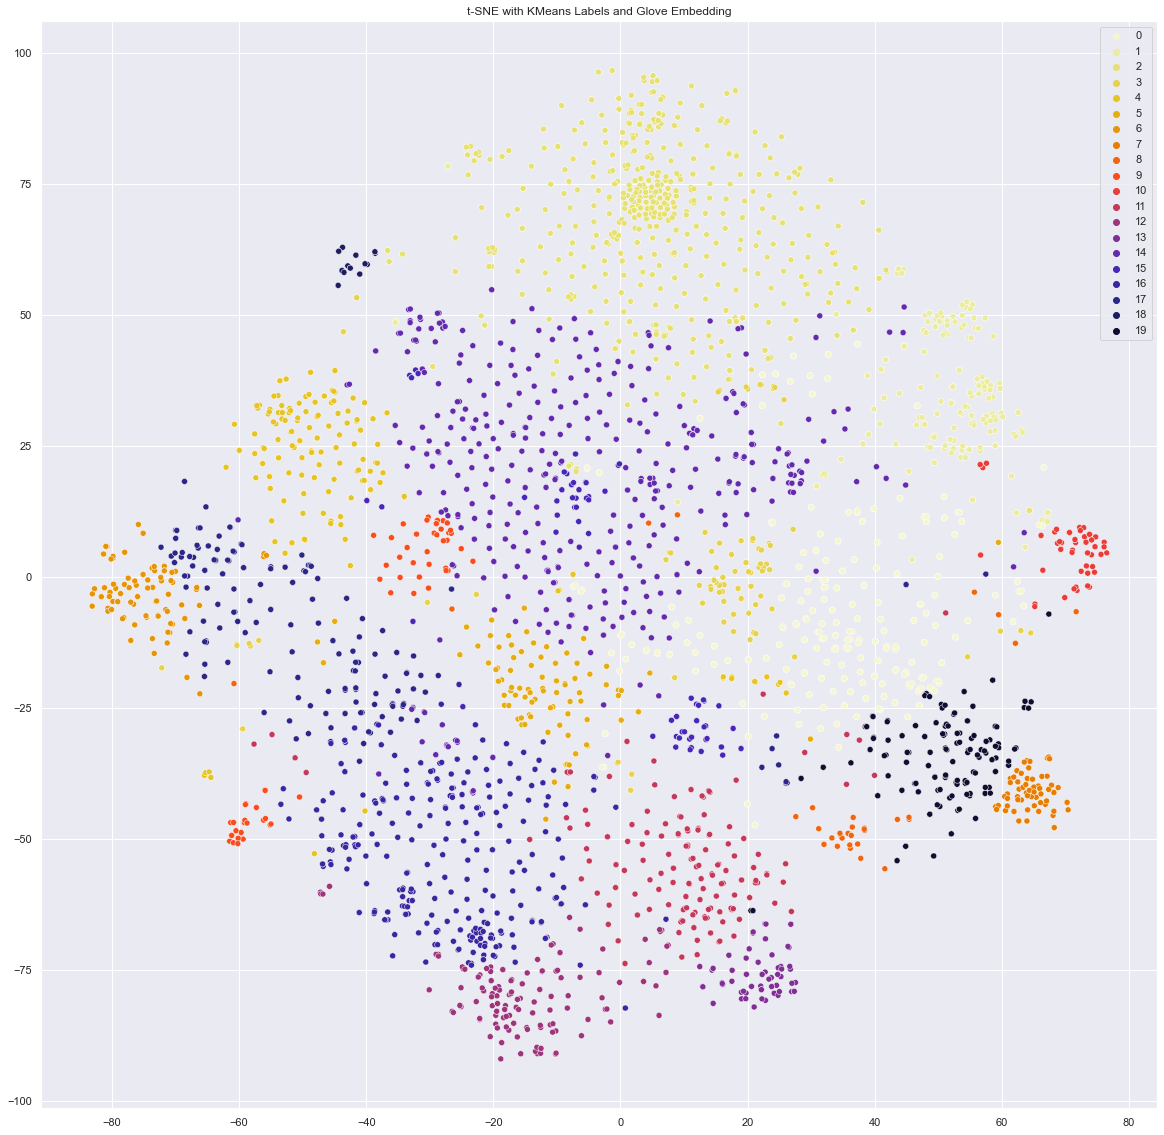

In [20]:
# 시각화
sns.set(rc={'figure.figsize':(20,20)})
# colors
#palette = sns.hls_palette(10, l=.4, s=.9) 
palette = sns.color_palette('CMRmap_r',20)
# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred,
                legend='full',palette=palette)     # kmeans로 예측

plt.title('t-SNE with KMeans Labels and Glove Embedding')
plt.savefig('tsne_glove_embedding_all.png')
plt.show()

In [21]:
data['cluster'] = y_pred
data

,comment,sentiment,cluster
0,이 거 그거 같다 그 분노의 질주 더 익스트림에서 샤를리즈 테론 사이퍼 이 좀비 타...,0.0,16
1,아니 ㅋㅋ 브레이크 등 왜 안 들어오냐고 아 ㅋㅋ,0.0,9
2,볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...,0.0,14
3,주차부터 멋지게 하셨네요,0.0,2
4,운전 실력 굳 국기 게양대 파워 클라스 인정,0.0,2
...,...,...,...
5659,최명숙 딱 봐도 님이 잼민이 같아 요 능지가,1.0,12
5660,최명숙 아니 행동하고 생각하는 게 잼민이 같다는 거에 요 이해력이 부족하신 듯,1.0,16
5661,잼민이 아니죠 어륜이죠,1.0,12
5662,누가 문재인 얼굴에다 계란 좀 던져줬으면 좋겠다,1.0,2


In [22]:
print(data['comment'][data['cluster']==1]) #267개
print()
print(data['comment'][data['cluster']==2])
print()
print(data['comment'][data['cluster']==3])
print()
print(data['comment'][data['cluster']==4])

14        키 햐급발진 나면 고객 탓 국내나 국외나 ㅋㅋ
30                    보는 것만으로도 공포네요
109                             판교네
228     진짜 저건 너무 햇다 이건 처벌들어가야 한다 진짜
344                           약하네ㅋㅋ
                   ...             
5608                        토나온 다ㅅㅂ
5636                  맞아야 정신차리지 아ㅋㅋ
5641                개한민국 보는 거 같네 ㅋㅋ
5645                     아 개시원하네 ㅋㅋ
5663                           지랄ㅋㅋ
Name: comment, Length: 267, dtype: object

3                     주차부터 멋지게 하셨네요
4          운전 실력 굳 국기 게양대 파워 클라스 인정
10                         안전한 차 맞냐
13                            2억 겨우
21             덤프트럭 타야됨 급발진 없고 튼튼하고
                   ...             
5647    빠따주면 문재앙 내년에 빠 따로 줘 팰 자신 있다
5649                      시발 이해해버렸다
5652            저걸 확 그냥 때릴 수도 없고 스벌
5656        어그로 장인 틀 딱 아 한글 교실 좀 가라
5662     누가 문재인 얼굴에다 계란 좀 던져줬으면 좋겠다
Name: comment, Length: 930, dtype: object

209                               사람은 살렸네 사고 시 안전성은 최고인 듯
249                                        아니 왜 저러는 거야 진짜
268   

In [23]:
print(data['comment'][(data['sentiment']==0)&(data['cluster']==1)])
print()
print(data['comment'][(data['sentiment']==1)&(data['cluster']==1)])

14        키 햐급발진 나면 고객 탓 국내나 국외나 ㅋㅋ
30                    보는 것만으로도 공포네요
109                             판교네
228     진짜 저건 너무 햇다 이건 처벌들어가야 한다 진짜
344                           약하네ㅋㅋ
346           혹시나 구호 물품 같은 거 보내지 마라
349                            아 ㅋㅋ
408                         스텔스 방패네
412              마지막 껀 진짜 투명망토 같은 데
431                         감쪽같네 진짜
449                           대박이네요
468                 아 저 망토 해리포터 껀 데
531            아 ㅋㅋ 숨바꼭질 계속 이기겠네 ㅋㅋ
546                    알려야 팔아먹죠 ㅋㅋㅋ
548      약간 울퉁불퉁한 게 진짜 바위 같이 생김 ㅋㅋㅋ
570          아진짜 끔찍하네 왜 저렇게 위험하게 ㅜㅜ
621              아이고 안타깝다 진짜 ㅠㅠㅠㅠㅠㅠ
624      아 진짜 너무 속상해서 욕 나온 다 가슴 아프다
664                      진짜 너무 불쌍하다
897       키 햐급발진 나면 고객 탓 국내나 국외나 ㅋㅋ
913                   보는 것만으로도 공포네요
992                             판교네
1111    진짜 저건 너무 햇다 이건 처벌들어가야 한다 진짜
1227                          약하네ㅋㅋ
1229          혹시나 구호 물품 같은 거 보내지 마라
1232                           아 ㅋㅋ
1291                        스텔스 방패네
1295             마지막 껀 진짜 투명

Found distortion for 2 clusters
Found distortion for 3 clusters
Found distortion for 4 clusters
Found distortion for 5 clusters
Found distortion for 6 clusters
Found distortion for 7 clusters
Found distortion for 8 clusters
Found distortion for 9 clusters
Found distortion for 10 clusters
Found distortion for 11 clusters
Found distortion for 12 clusters
Found distortion for 13 clusters
Found distortion for 14 clusters
Found distortion for 15 clusters
Found distortion for 16 clusters
Found distortion for 17 clusters
Found distortion for 18 clusters
Found distortion for 19 clusters
Found distortion for 20 clusters
Found distortion for 21 clusters
Found distortion for 22 clusters
Found distortion for 23 clusters
Found distortion for 24 clusters
Found distortion for 25 clusters
Found distortion for 26 clusters
Found distortion for 27 clusters
Found distortion for 28 clusters
Found distortion for 29 clusters
Found distortion for 30 clusters
Found distortion for 31 clusters
Found distortion f

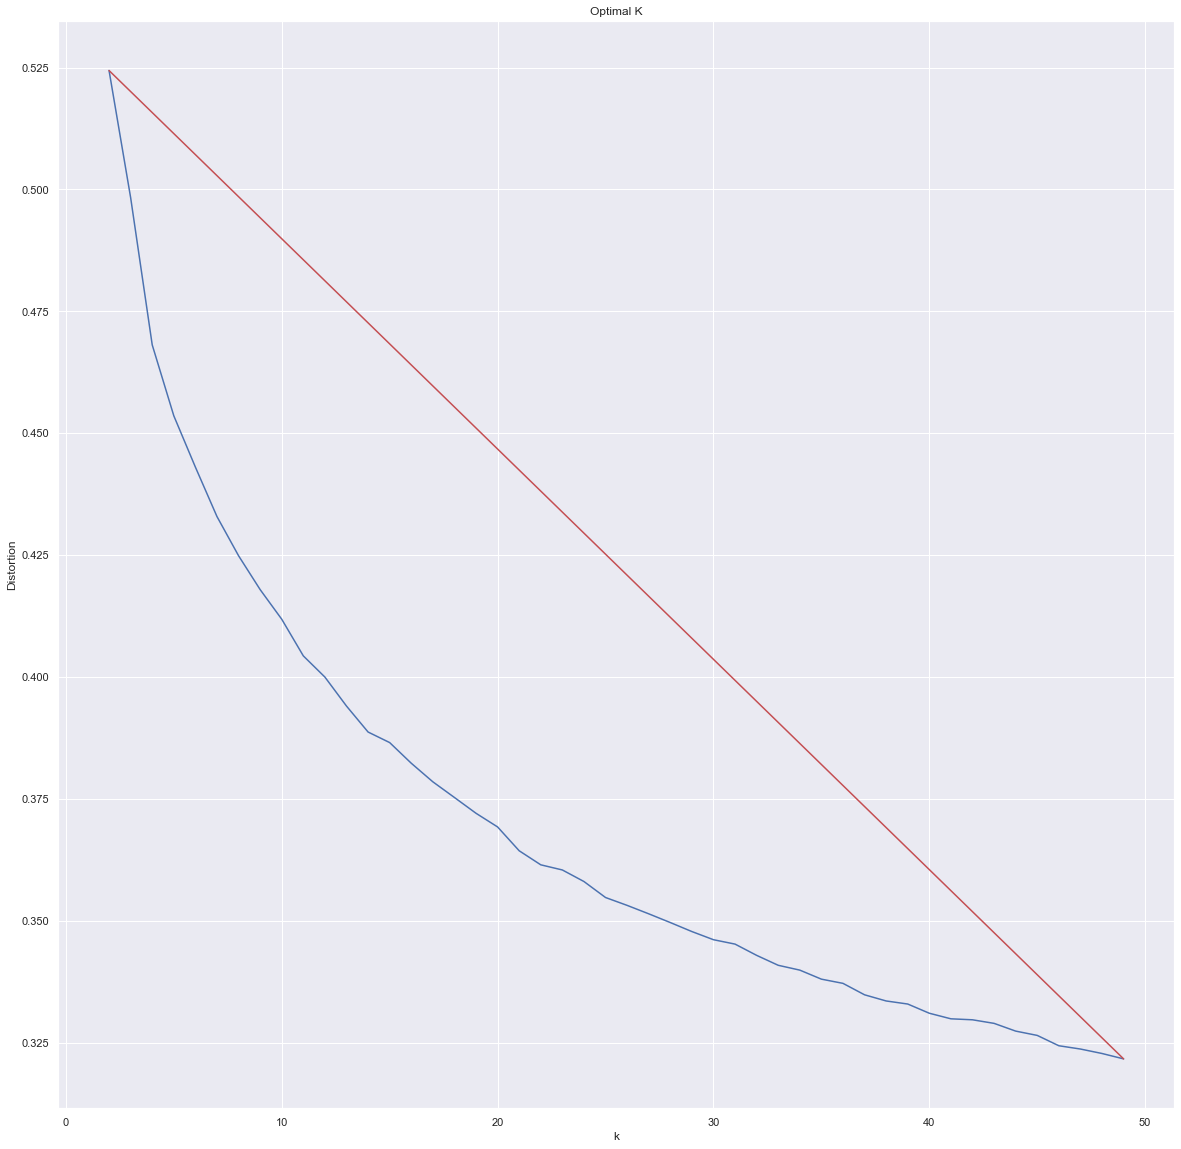

In [24]:

# 최적의 K 찾기 : 군집 갯수 k 찾기
from sklearn import metrics
from scipy.spatial.distance import cdist

# K=50 개의 클러스터에 대해서 시각화
distortions = []
K = range(2, 50)
#tqdm.pandas()

for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(sentence_glove)
    k_means.fit(sentence_glove)
    distortions.append(sum(np.min(cdist(sentence_glove, k_means.cluster_centers_, 'euclidean'), axis=1)) / sentence_glove.shape[0])
    
    print('Found distortion for {} clusters'.format(k))

# Visualization
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K')
plt.show()